In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import acquire_plays_data
import prep_plays
import wrangle_plays_data
import re
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

In [2]:
df = acquire_plays_data.get_plays_data()

In [3]:
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [4]:
df = prep_plays.prep_plays_data()

In [5]:
df.head().T

,0,1,2,3,4
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
team_by_comp_yds,3,3,3,3,3
defendersInTheBox,7,7,6,6,8
numberOfPassRushers,4,4,4,5,6
QB_under_pressure,0.0,0.0,0.0,1.0,0.0
gameClock,15:00:00,13:10:00,13:05:00,13:01:00,10:59:00
absoluteYardlineNumber,90,49,49,49,11


In [8]:
df.describe()

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,absoluteYardlineNumber,epa,pass_stopped,playResult,...,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
count,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,...,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000
mean,2.590612,1.900594,8.966061,15.628610,6.014352,4.191989,59.922710,0.107399,0.349803,7.392800,...,0.046644,0.000823,0.012529,0.664020,0.141874,0.000176,0.123699,0.035880,0.640668,0.176990
std,1.125498,0.840728,3.977491,9.230681,0.992398,0.878413,23.607128,1.537225,0.476922,10.084464,...,0.210882,0.028685,0.111231,0.472346,0.348931,0.013283,0.329247,0.185997,0.479819,0.381671
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,-11.935951,0.000000,-70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,7.000000,7.000000,5.000000,4.000000,40.000000,-0.602603,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,10.000000,15.000000,6.000000,4.000000,60.000000,-0.160139,0.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,3.000000,10.000000,24.000000,7.000000,5.000000,80.000000,1.033558,1.000000,11.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,4.000000,41.000000,32.000000,11.000000,9.000000,109.000000,8.629316,1.000000,97.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17001 entries, 0 to 17006
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   playDescription         17001 non-null  object 
 1   quarter                 17001 non-null  int64  
 2   down                    17001 non-null  int64  
 3   yardsToGo               17001 non-null  int64  
 4   team_by_comp_yds        17001 non-null  int64  
 5   defendersInTheBox       17001 non-null  float64
 6   numberOfPassRushers     17001 non-null  float64
 7   QB_under_pressure       17001 non-null  object 
 8   gameClock               17001 non-null  object 
 9   absoluteYardlineNumber  17001 non-null  float64
 10  epa                     17001 non-null  float64
 11  pass_stopped            17001 non-null  int64  
 12  playResult              17001 non-null  int64  
 13  RB                      17001 non-null  object 
 14  TE                      17001 non-null

In [15]:
# Nickle - 5 defensive backs Dime 6 defensive backs. 
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_plays_data.train_validate_test(df)

In [26]:
X_train.T

,4170,14076,15897,2723,632,15975,11753,5365,6662,4350,...,2766,5241,184,4947,2719,2507,10063,10013,3002,13187
quarter,2,4,3,3,4,1,2,2,4,2,...,1,4,2,1,2,2,2,3,4,2
down,2,1,2,1,1,2,1,2,3,1,...,1,2,3,2,1,1,2,3,2,2
yardsToGo,4,10,3,10,9,9,10,10,30,10,...,10,8,3,8,10,10,3,8,3,8
team_by_comp_yds,2,12,23,16,32,20,7,27,26,9,...,14,8,6,24,28,4,30,17,30,1
defendersInTheBox,6,6,8,7,6,7,6,6,4,6,...,6,7,7,6,7,7,5,6,7,5
numberOfPassRushers,4,5,7,4,4,5,4,4,3,4,...,5,4,4,4,4,4,4,4,4,4
QB_under_pressure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absoluteYardlineNumber,46,65,103,43,101,45,35,56,49,77,...,35,83,72,22,36,60,84,99,26,85
epa,-0.611122,-0.0324447,1.78916,-0.0251903,-0.0668555,-0.63173,-0.515568,-0.477917,0.257609,-0.151839,...,-0.328169,0.0112684,1.66391,1.60138,-0.191864,2.51039,0.589207,2.46321,0.759128,-0.833434
playResult,0,6,7,8,1,0,0,1,16,0,...,3,7,13,10,0,42,6,11,8,0


# Exploring the data

Text(0.5, 1.0, 'Nickle Defense and yards gained')

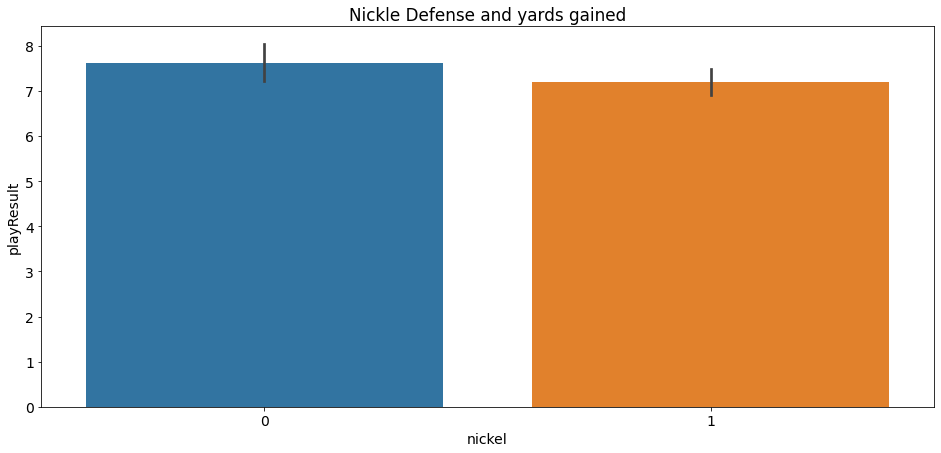

In [81]:
sns.barplot(data=X_train,x='nickel', y='playResult')
plt.title("Nickle Defense and yards gained")

Text(0.5, 1.0, 'Dime Defense Against Pass')

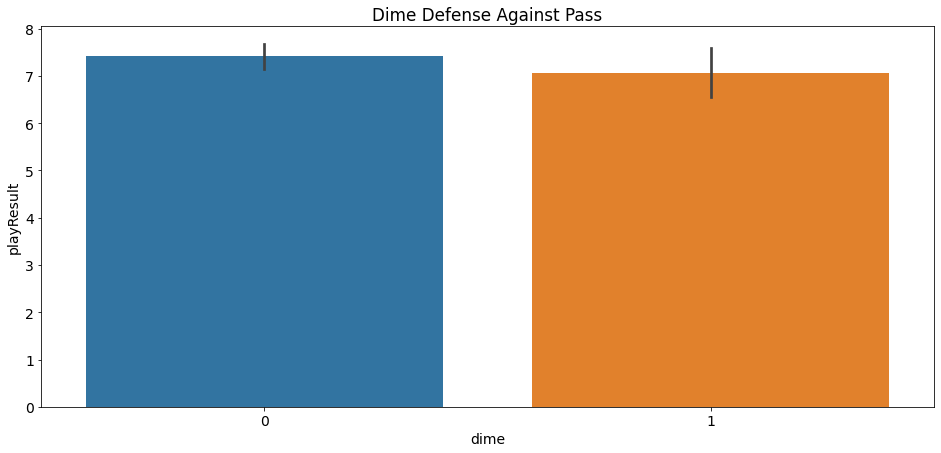

In [82]:
sns.barplot(data=X_train,x='dime', y='playResult')
plt.title("Dime Defense Against Pass")

Text(0.5, 1.0, 'Nickle Defense Against Pass')

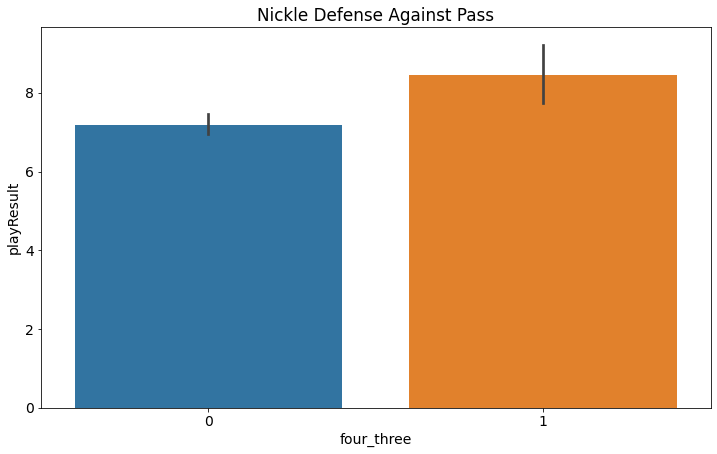

In [37]:
sns.barplot(data=X_train,x='four_three', y='playResult')
plt.title("Nickle Defense Against Pass")

Text(0.5, 1.0, 'Nickle Defense Against Pass')

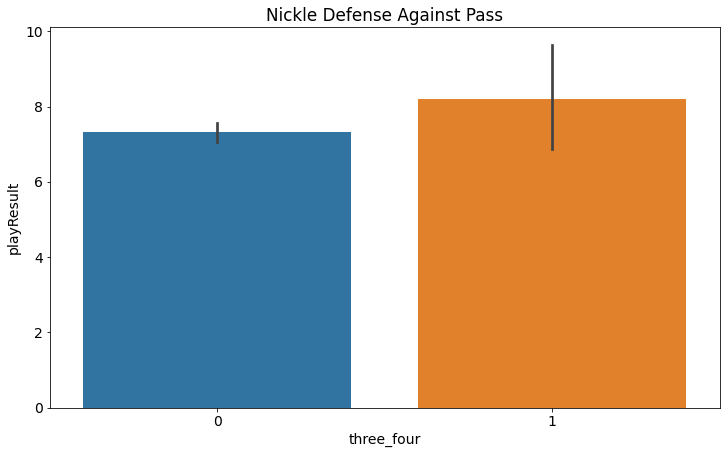

In [38]:
sns.barplot(data=X_train,x='three_four', y='playResult')
plt.title("Nickle Defense Against Pass")

<AxesSubplot:xlabel='playResult', ylabel='Density'>

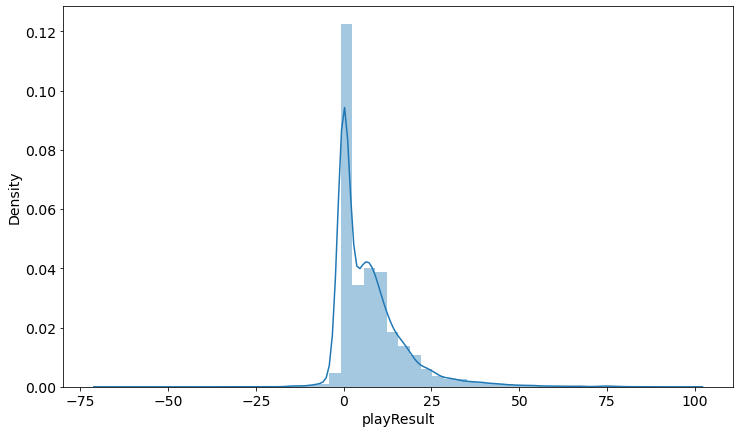

In [39]:
sns.distplot(X_train.playResult)

In [42]:
df1 = pd.read_csv('plays.csv')

In [48]:
df1.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,ATL,ATL,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1


In [87]:
df1.personnelD.value_counts()

4 DL, 2 LB, 5 DB                    6652
3 DL, 3 LB, 5 DB                    3103
4 DL, 3 LB, 4 DB                    2407
2 DL, 4 LB, 5 DB                    2109
4 DL, 1 LB, 6 DB                    1104
3 DL, 2 LB, 6 DB                    1047
2 DL, 3 LB, 6 DB                     917
3 DL, 4 LB, 4 DB                     743
1 DL, 4 LB, 6 DB                     311
1 DL, 5 LB, 5 DB                     266
1 DL, 3 LB, 7 DB                     102
5 DL, 2 LB, 4 DB                      93
3 DL, 1 LB, 7 DB                      82
2 DL, 2 LB, 7 DB                      71
0 DL, 4 LB, 7 DB                      32
4 DL, 0 LB, 7 DB                      24
4 DL, 4 LB, 3 DB                      23
0 DL, 5 LB, 6 DB                      17
5 DL, 3 LB, 3 DB                      14
5 DL, 1 LB, 5 DB                      13
6 DL, 4 LB, 1 DB                      12
6 DL, 3 LB, 2 DB                      12
0 DL, 6 LB, 5 DB                       6
2 DL, 3 LB, 5 DB, 1 WR                 4
4 DL, 5 LB, 2 DB

<AxesSubplot:xlabel='possessionTeam', ylabel='offensePlayResult'>

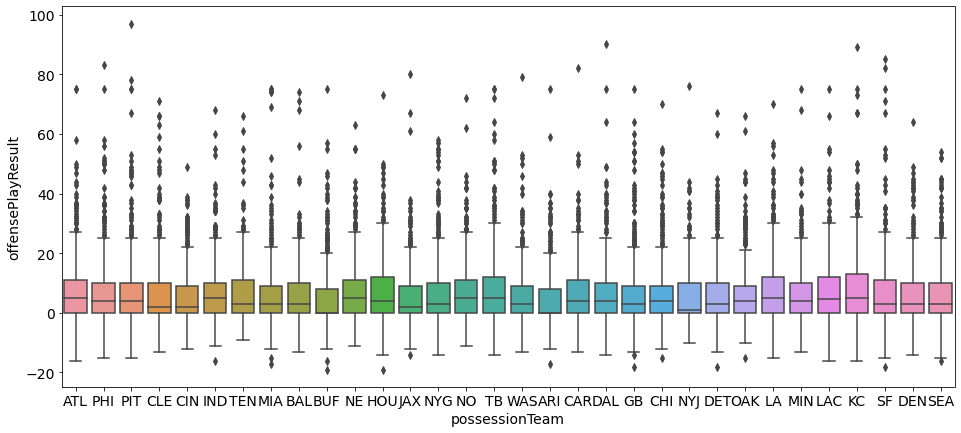

In [47]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='possessionTeam', y= 'offensePlayResult')

<AxesSubplot:xlabel='offensePlayResult', ylabel='offenseFormation'>

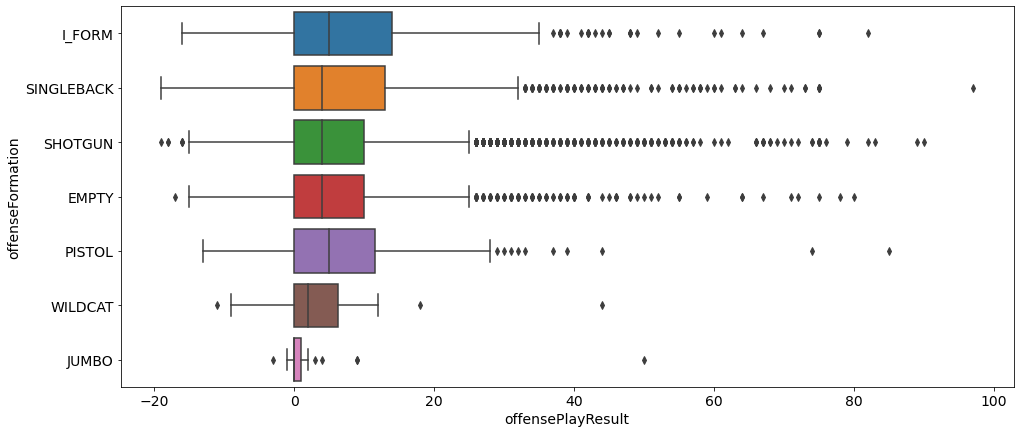

In [68]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'offenseFormation')

<AxesSubplot:xlabel='offensePlayResult', ylabel='offenseFormation'>

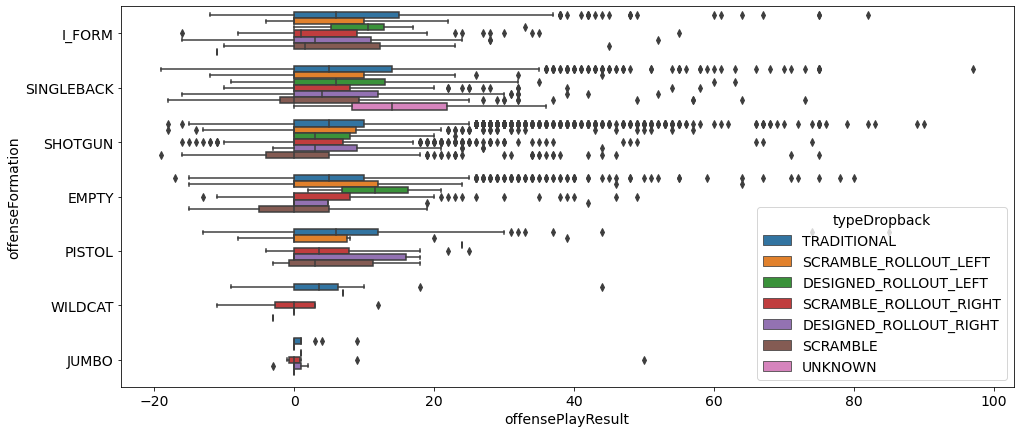

In [67]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'offenseFormation', hue='typeDropback')

<AxesSubplot:xlabel='offensePlayResult', ylabel='personnelD'>

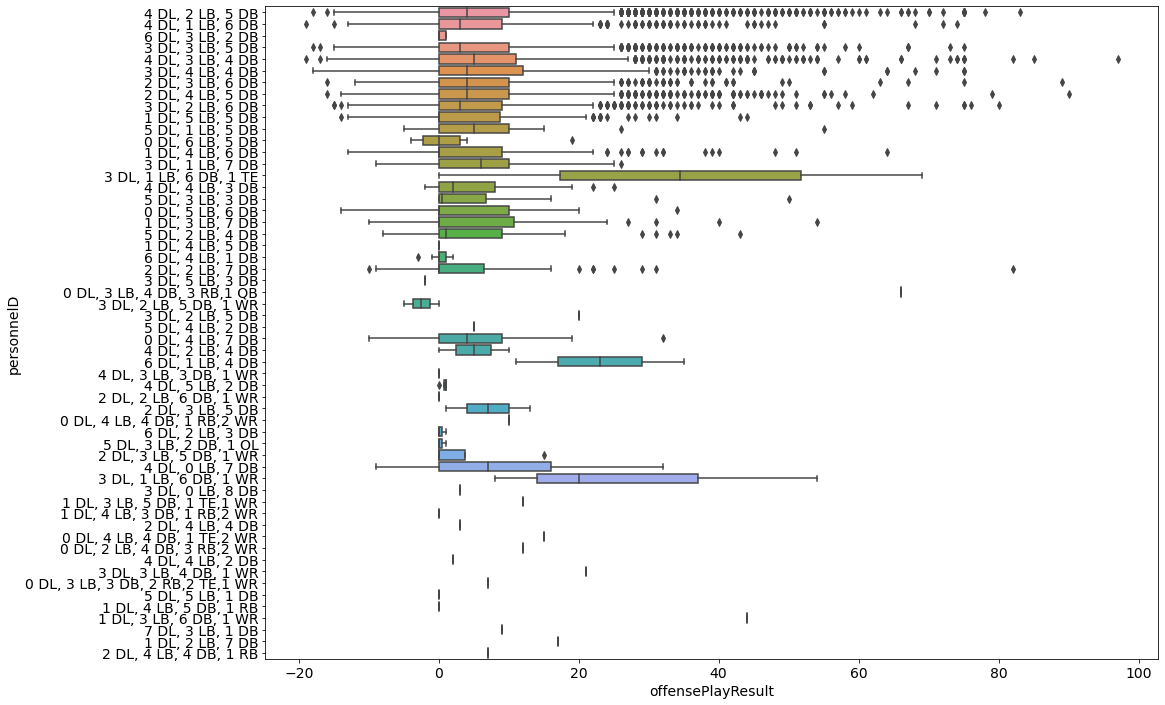

In [54]:
plt.rc("figure", figsize=(16, 12))
sns.boxplot(data=df1, x='offensePlayResult', y= 'personnelD')

<AxesSubplot:xlabel='offensePlayResult', ylabel='personnelO'>

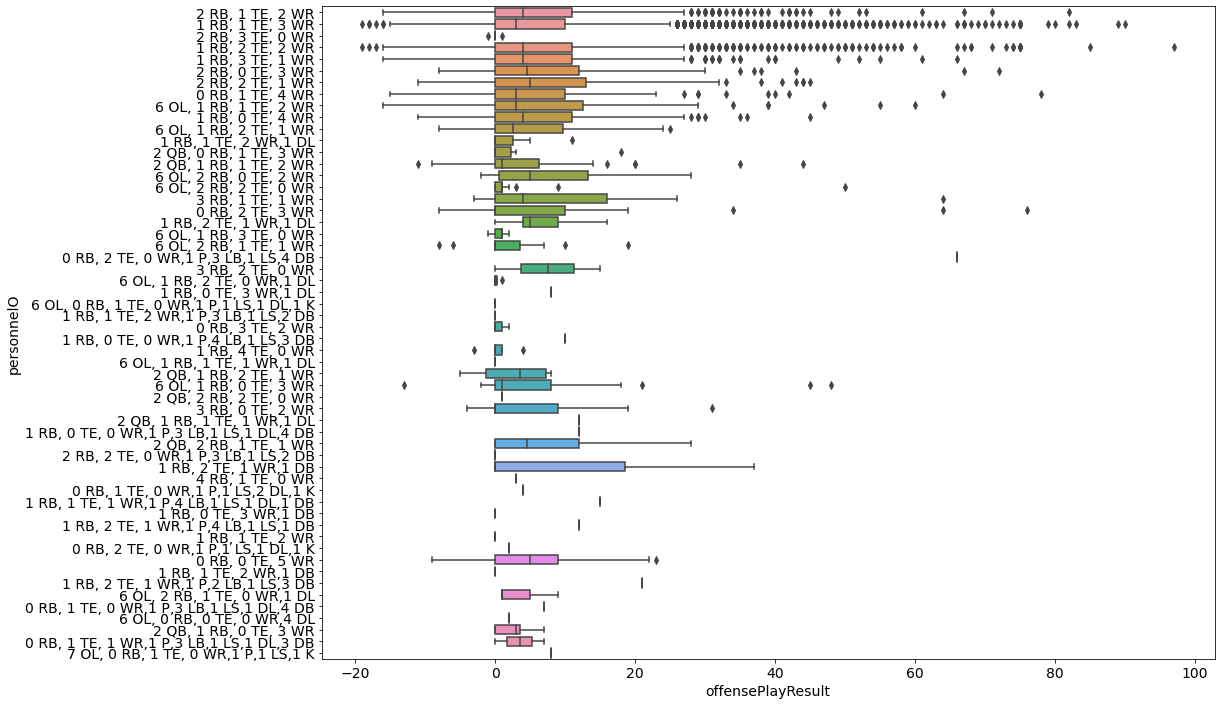

In [56]:
plt.rc("figure", figsize=(16, 12))
sns.boxplot(data=df1, x='offensePlayResult', y= 'personnelO')

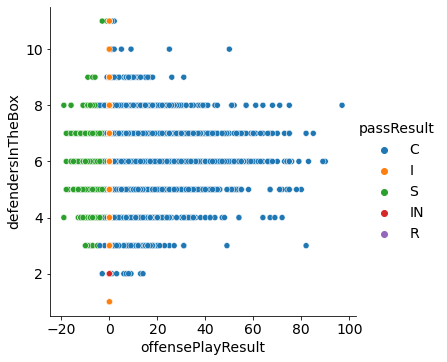

In [85]:
plt.rc("figure", figsize=(16, 7))
sns.relplot(x='offensePlayResult', y='defendersInTheBox', hue='passResult', data=df1)

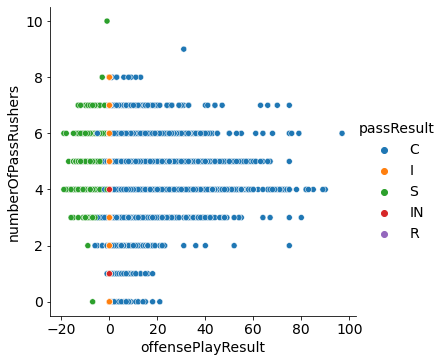

In [59]:
plt.rc("figure", figsize=(16, 7))
sns.relplot(x='offensePlayResult', y='numberOfPassRushers', hue='passResult', data=df1)

<AxesSubplot:xlabel='yardsToGo', ylabel='passResult'>

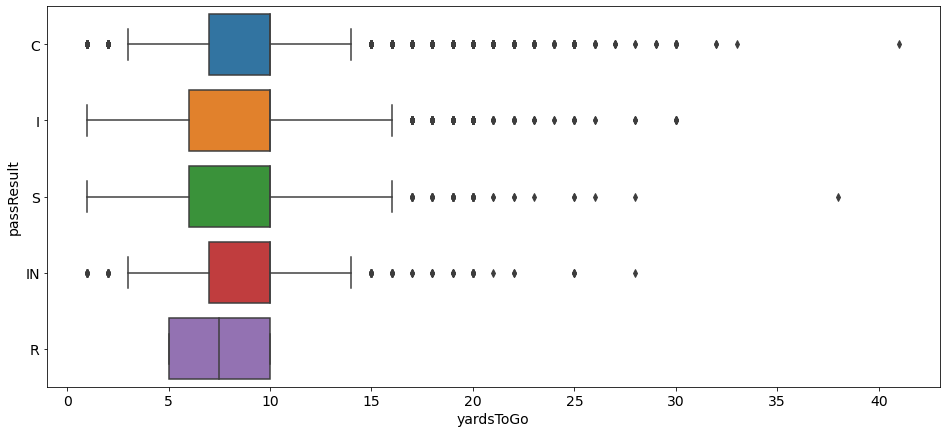

In [70]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='yardsToGo', y= 'passResult')

<AxesSubplot:xlabel='yardsToGo', ylabel='passResult'>

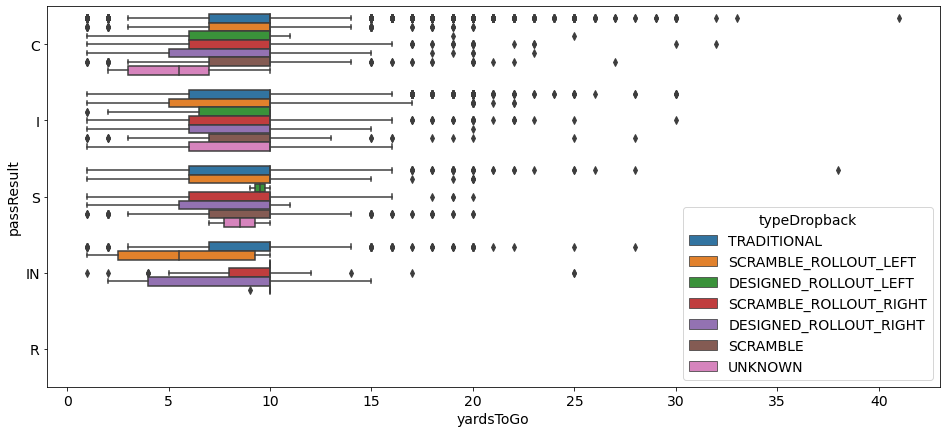

In [71]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='yardsToGo', y= 'passResult', hue='typeDropback')

<AxesSubplot:xlabel='offensePlayResult', ylabel='passResult'>

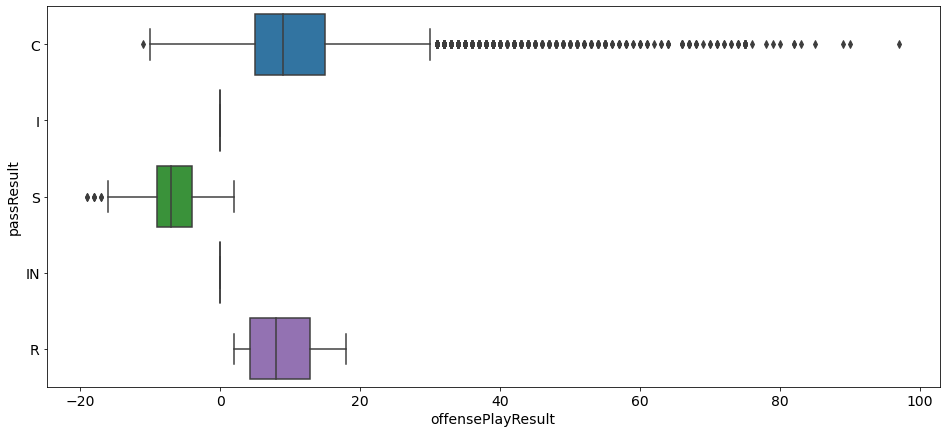

In [61]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'passResult')

Text(0.5, 1.0, 'Average Yards Gained per Quater')

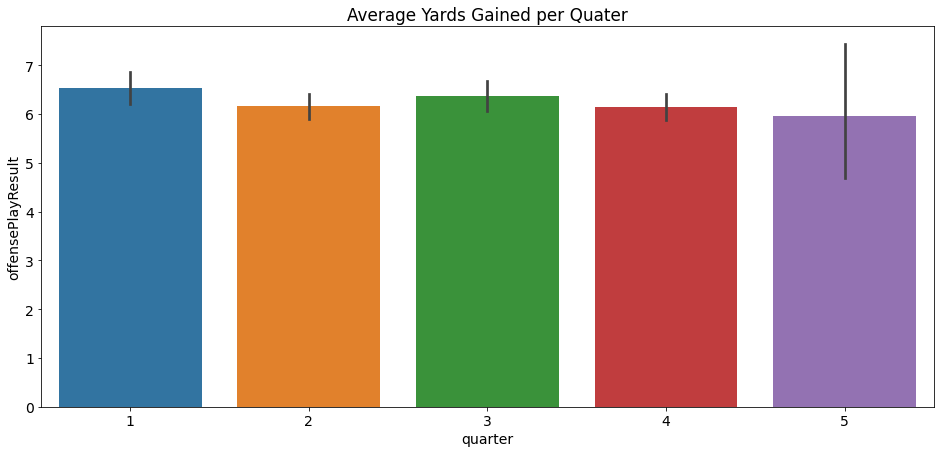

In [75]:
sns.barplot(data=df1,x='quarter', y='offensePlayResult')
plt.title("Average Yards Gained per Quater")

Text(0.5, 1.0, 'Average Yards Gained per Quater')

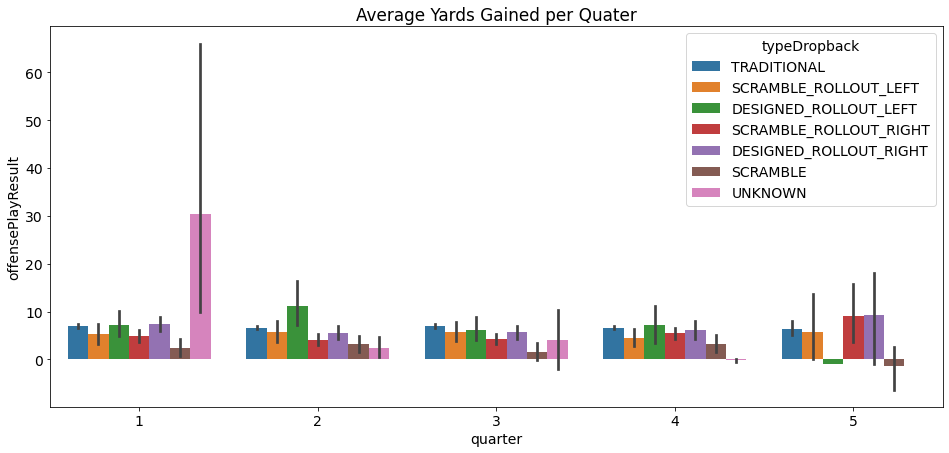

In [76]:
sns.barplot(data=df1,x='quarter', y='offensePlayResult', hue='typeDropback')
plt.title("Average Yards Gained per Quater")

Text(0.5, 1.0, 'Average Yards Gained per Down')

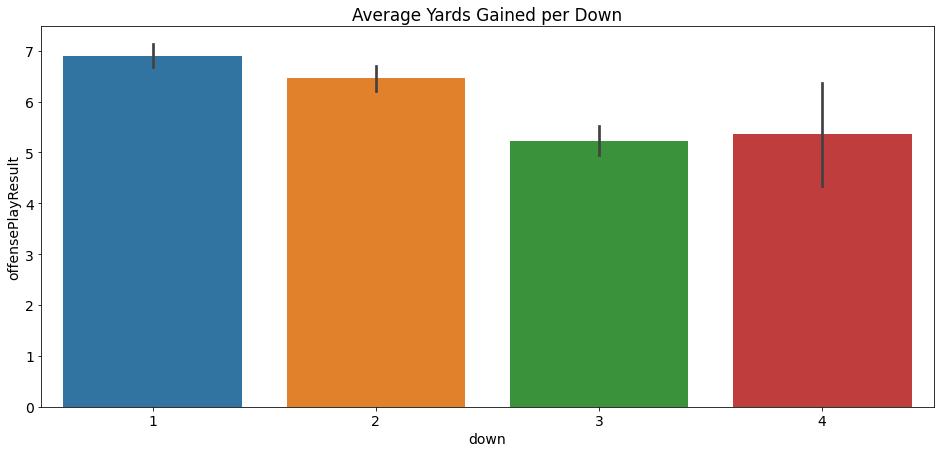

In [78]:
sns.barplot(data=df1,x='down', y='offensePlayResult')
plt.title("Average Yards Gained per Down")

Text(0.5, 1.0, 'Average Yards Gained per Down')

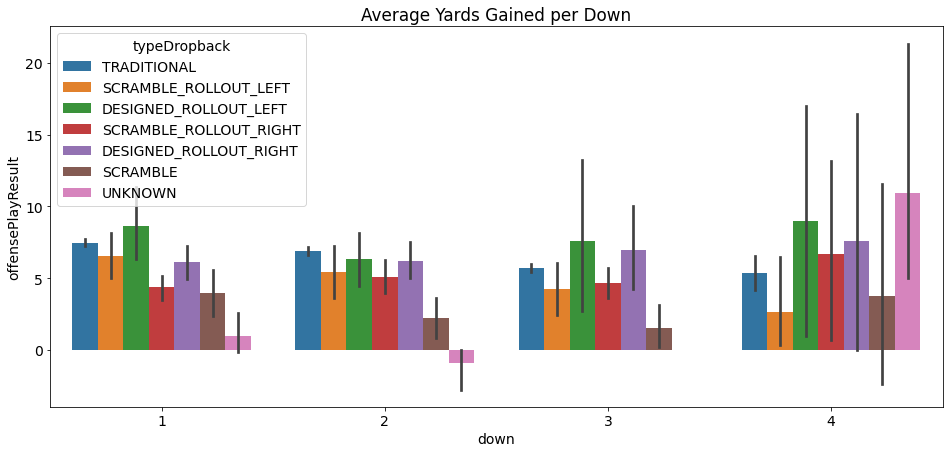

In [79]:
sns.barplot(data=df1,x='down', y='offensePlayResult',  hue='typeDropback')
plt.title("Average Yards Gained per Down")

<AxesSubplot:xlabel='offensePlayResult', ylabel='absoluteYardlineNumber'>

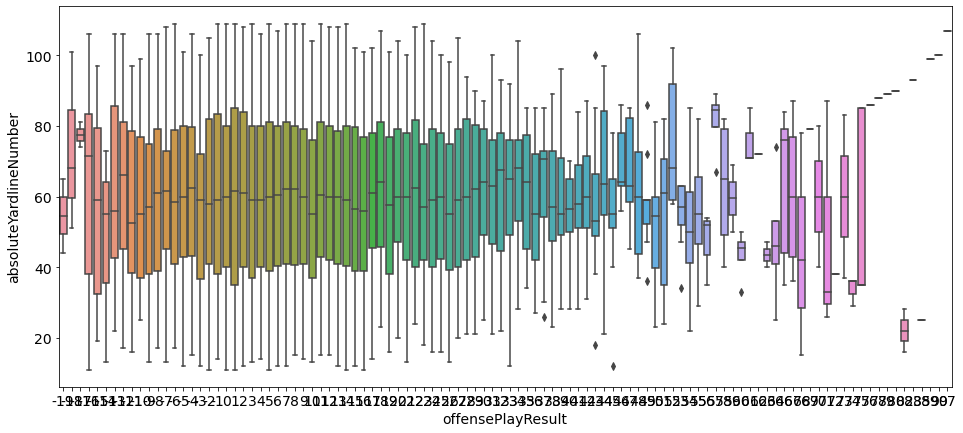

In [65]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'absoluteYardlineNumber')

# Does defensive/offensive personnel matter on stopping a pass?